In [1]:
import cv2
import matplotlib.pyplot as plt
from rembg import remove 
from PIL import Image
import numpy as np

In [8]:
path = "Image1/Capsule-shape/000031967.jpg"

In [9]:
img1 = Image.open(path)
img2 = remove(img1)

In [10]:
imgA = cv2.imread(path)
print(imgA.shape)
imgB = remove(imgA)
print(imgB.shape)

(480, 640, 3)
(480, 640, 4)


In [13]:
x = cv2.cvtColor(imgB, cv2.COLOR_RGBA2BGR)
x.shape

(480, 640, 3)

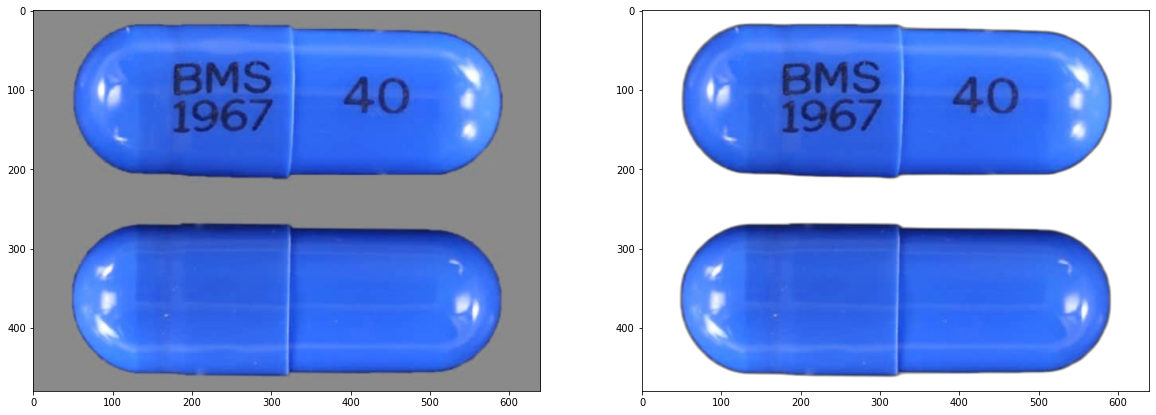

In [11]:
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(imgA)
plt.subplot(122)
plt.imshow(imgB)

In [24]:
import shutil
import os    

"""
Checking folder in folders: 
"""

path_folder_images = "Image1"
for name in os.listdir(path_folder_images):
    try:
        shutil.rmtree(os.path.join(path_folder_images, name, ".ipynb_checkpoints"), ignore_errors=True)
    except Exception as e:
        pass
    for sub_name in os.listdir(os.path.join(path_folder_images,name)):
        if os.path.isdir(os.path.join(path_folder_images,name, sub_name)):
            print(name)
            for subsub_name in os.listdir(os.path.join(path_folder_images, name, sub_name)):
                if os.path.isdir(os.path.join(path_folder_images,name, sub_name, subsub_name)):
                    print(name)
                    break 
                source = os.path.join(path_folder_images,name, sub_name, subsub_name)
                destination = os.path.join(path_folder_images, name, f"{sub_name}_"+subsub_name)
                shutil.copy(source, destination)
            try:
                shutil.rmtree(os.path.join(path_folder_images,name, sub_name), ignore_errors=True)
            except Exception as e:
                pass

In [28]:
import cv2
import os
from rembg import remove
from tqdm import tqdm

path_folder_output = "Output"
list_name = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_90_COUNTERCLOCKWISE]

for name in tqdm(os.listdir(path_folder_images)):
    if not os.path.exists(os.path.join(path_folder_output, name)):
        os.mkdir(os.path.join(path_folder_output, name))
    for index_name in os.listdir(os.path.join(path_folder_images, name)):
        # print(index_name)
        name_file = index_name.split(".")[0]
        img = cv2.imread(os.path.join(path_folder_images, name, index_name))
        img = remove(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
        if len(contours) > 2:
            print("Name data_fide !!!!!!!!!!!!!!!1")
            continue
        for i in range(len(contours)):
            x, y, width, height = cv2.boundingRect(contours[i])
            src = img[y:y+height, x:x+width]
            tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
            _, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
            b, g, r = cv2.split(src)
            rgba = [b, g, r, alpha]
            dst = cv2.merge(rgba, 10)
            if dst.shape[0] < dst.shape[1]:
                for j in list_name:
                    dst1 = cv2.rotate(dst, j)
                    cv2.imwrite(f"{path_folder_output}/{name}/{name_file}_{j}.png", dst1)
            else:
                cv2.imwrite(f"{path_folder_output}/{name}/{name_file}_1.png", dst)

  0%|                                                    | 0/18 [00:00<?, ?it/s]

Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1


 17%|███████▎                                    | 3/18 [04:00<14:00, 56.04s/it]

Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1


 22%|█████████▊                                  | 4/18 [05:34<16:32, 70.87s/it]

Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1


 33%|██████████████▎                            | 6/18 [11:22<24:27, 122.32s/it]

Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1


 39%|████████████████▋                          | 7/18 [12:48<20:12, 110.21s/it]

Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1


 44%|███████████████████                        | 8/18 [15:21<20:40, 124.05s/it]

Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1


 50%|█████████████████████▌                     | 9/18 [17:41<19:19, 128.88s/it]

Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1


 56%|███████████████████████▎                  | 10/18 [23:48<26:59, 202.39s/it]

Name data_fide !!!!!!!!!!!!!!!1


 61%|█████████████████████████▋                | 11/18 [23:58<16:44, 143.57s/it]

Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1
Name data_fide !!!!!!!!!!!!!!!1


 61%|█████████████████████████▋                | 11/18 [41:24<26:21, 225.86s/it]


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import math
import shutil
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

path_file_csv = f"Dataof/labels_my-project-name_2023-03-22-11-12-24.csv"
name_image_background = "image_convert3.jpg"
# name_image_bone = "1gfg1_0.png"
# name_image_out = "rocket_pillow_paste.png"
path_folder_output = "Output"

ratio = 4

list_columns_name =["label_name", "bbox_x", "bbox_y", "bbox_width", "bbox_height", "image_name", "image_width", "image_height"] 
dict_columns_value = {x:[] for x in list_columns_name}
list_position_background = []
df = pd.read_csv(path_file_csv)
for i in range(df.shape[0]):
    x, y, w, h = df["bbox_x"].iloc[i], df["bbox_y"].iloc[i], df["bbox_width"].iloc[i], df["bbox_height"].iloc[i]
    list_position_background.append([int(x+w/2), int(y+h/2), w, h])

path_result = "Result" 
name_image = "images"
name_label = "labels"

shutil.rmtree(path_result)

for name in os.listdir(path_folder_output):
    if not os.path.exists(os.path.join(path_result, name, name_image )):
        os.makedirs(os.path.join(path_result, name, name_image ))
        os.makedirs(os.path.join(path_result, name, name_label ))
    im1 = Image.open(f'background/{name_image_background}')
    for fileout_path_image in os.listdir(os.path.join(path_folder_output, name)):
        im2 = Image.open(os.path.join(path_folder_output, name,fileout_path_image))
        back_im = im1.copy()
        name_out = fileout_path_image.split(".")[0]
        for idx in list_position_background: 
            dict_columns_value["label_name"].append(name_out)
            imA = im2.copy()
            width, height = imA.size
            if height/scale_w > idx[3]:
                scale_a = scale_h
            else:
                scale_a = scale_w

            imA = imA.resize((int(width/scale_a), int(height/scale_a)))
            imA = imA.convert("RGBA")
            w, h = imA.size
            back_im.paste(imA, (idx[0]-int(w/2), idx[1]-int(h/2)), imA)
            back_im.save(f"{path_result}/{name}/{name_image}/{name_out}.png", quality=95, format="png")
            dict_columns_value["bbox_x"].append(idx[0]-int(w/2))
            dict_columns_value["bbox_y"].append(idx[1]-int(h/2))
            dict_columns_value["bbox_width"].append(w)
            dict_columns_value["bbox_height"].append(h)
            dict_columns_value["image_name"].append(f"{name_out}.png")
            dict_columns_value["image_width"].append(im1.size[0])
            dict_columns_value["image_height"].append(im1.size[1])
    pd.DataFrame(dict_columns_value).to_csv(f"{path_result}/{name}/{name_label}/label_{name}.csv", index=False)

In [30]:
os.mkdir("D2/data1/data2")

FileNotFoundError: [Errno 2] No such file or directory: 'D2/data1/data2'

In [2]:
import cv2
import sys
import os
import numpy as np
from rembg import remove 
list_name = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_90_COUNTERCLOCKWISE]
img = cv2.imread('Image1/Barrel/t110401f.jpg')
img = remove(img)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

if len(contours) > 2:
    print(1)
    sys.exit()
    
for i in range(len(contours)):
    x, y, width, height = cv2.boundingRect(contours[i])
    src = img[y:y+height, x:x+width]
    tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
    b, g, r = cv2.split(src)
    rgba = [b, g, r, alpha]
    dst = cv2.merge(rgba, 10)
    if dst.shape[0] < dst.shape[1]:
        for j in list_name:
            dst1 = cv2.rotate(dst, j)
            cv2.imwrite(f"D1/1gfg{i}_{j}.png", dst1)
    else:
        cv2.imwrite(f"D1/1gfg{i}_{2}.png", dst)

In [1]:
import cv2
import sys
import numpy as np
from rembg import remove 
list_name = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_90_COUNTERCLOCKWISE]
img = cv2.imread('Image1/Barrel/pill21989-1.png')
img = remove(img)
img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

if len(contours) > 2:
    print(1)
    sys.exit()
    
for i in range(len(contours)):
    x, y, width, height = cv2.boundingRect(contours[i])
    src = img[y:y+height, x:x+width]
    tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
    b, g, r = cv2.split(src)
    rgba = [b, g, r, alpha]
    dst = cv2.merge(rgba, 10)
    if dst.shape[0] < dst.shape[1]:
        for j in list_name:
            dst1 = cv2.rotate(dst, j)
            cv2.imwrite(f"D1/1gfg{i}_{j}.png", dst1)
    else:
        cv2.imwrite(f"D1/1gfg{i}_{2}.png", dst)

1


SystemExit: 

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:
import pandas as pd
import math
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter

path_file_csv = f"Dataof/labels_my-project-name_2023-03-22-11-12-24.csv"
name_image_background = "image_convert3.jpg"
name_image_bone = "1gfg1_0.png"
name_image_out = "rocket_pillow_paste.png"

ratio = 4

list_columns_name =["label_name", "bbox_x", "bbox_y", "bbox_width", "bbox_height", "image_name", "image_width", "image_height"] 
dict_columns_value = {x:[] for x in list_columns_name}
list_position_background = []
df = pd.read_csv(path_file_csv)
for i in range(df.shape[0]):
    x, y, w, h = df["bbox_x"].iloc[i], df["bbox_y"].iloc[i], df["bbox_width"].iloc[i], df["bbox_height"].iloc[i]
    list_position_background.append([int(x+w/2), int(y+h/2), w, h])

im1 = Image.open(f'background/{name_image_background}')
im2 = Image.open(f'D1/{name_image_bone}')
back_im = im1.copy()

for idx in list_position_background: 
    dict_columns_value["label_name"].append(name_image_bone.split(".")[0])
    imA = im2.copy()
    width, height = imA.size
    if width > idx[2]:
        scale_w = math.ceil(width/idx[2]) + ratio
    imA = imA.resize((int(width/scale_w), int(height/scale_w)))
    imA = imA.convert("RGBA")
    w, h = imA.size
    back_im.paste(imA, (idx[0]-int(w/2), idx[1]-int(h/2)), imA)
    dict_columns_value["bbox_x"].append(idx[0]-int(w/2))
    dict_columns_value["bbox_y"].append(idx[1]-int(h/2))
    dict_columns_value["bbox_width"].append(w)
    dict_columns_value["bbox_height"].append(h)
    dict_columns_value["image_name"].append(name_image_out)
    dict_columns_value["image_width"].append(im1.size[0])
    dict_columns_value["image_height"].append(im1.size[1])
pd.DataFrame(dict_columns_value).to_csv("data.csv", index=False)

In [ ]:
import cv2
import numpy as np
list_name = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_90_COUNTERCLOCKWISE]
img = cv2.imread('1.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
for i in range(len(contours)):
    x, y, width, height = cv2.boundingRect(contours[i])
    src = img[y:y+height, x:x+width]
    tmp = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, alpha = cv2.threshold(tmp, 10, 255, cv2.THRESH_BINARY)#+cv2.THRESH_OTSU)
    b, g, r = cv2.split(src)
    rgba = [b, g, r, alpha]
    dst = cv2.merge(rgba, 10)
    # print(dst.shape)
    if dst.shape[0] < dst.shape[1]:
        for j in list_name:
            dst1 = cv2.rotate(dst, j)
            cv2.imwrite(f"D1/1gfg{i}_{j}.png", dst1)
    else:
        cv2.imwrite(f"D1/1gfg{i}_{2}.png", dst)